# Experiment 2 - Adaboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import load_data function from helper file 
%load_ext autoreload
%autoreload 2

# fix system path
import sys
sys.path.append("/home/jovyan/work")

First lets do some EDA on the training data, to determine the distribution of each variable. This could assist in visualising the difference between 1 and 0

In [3]:
# import dataset - train
training_data = pd.read_csv('../data/raw/train (1).csv')

In [4]:
# inspect the data
training_data.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
Id_old         8000 non-null int64
Id             8000 non-null int64
GP             8000 non-null int64
MIN            8000 non-null float64
PTS            8000 non-null float64
FGM            8000 non-null float64
FGA            8000 non-null float64
FG%            8000 non-null float64
3P Made        8000 non-null float64
3PA            8000 non-null float64
3P%            8000 non-null float64
FTM            8000 non-null float64
FTA            8000 non-null float64
FT%            8000 non-null float64
OREB           8000 non-null float64
DREB           8000 non-null float64
REB            8000 non-null float64
AST            8000 non-null float64
STL            8000 non-null float64
BLK            8000 non-null float64
TOV            8000 non-null float64
TARGET_5Yrs    8000 non-null int64
dtypes: float64(18), int64(4)
memory usage: 1.3 MB


In [7]:
training_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [8]:
training_data.shape

(8000, 22)

In [9]:
# how many distinct id's are there?
len(training_data.Id.unique())

8000

In [10]:
# check distribution of the target
training_data.TARGET_5Yrs.value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

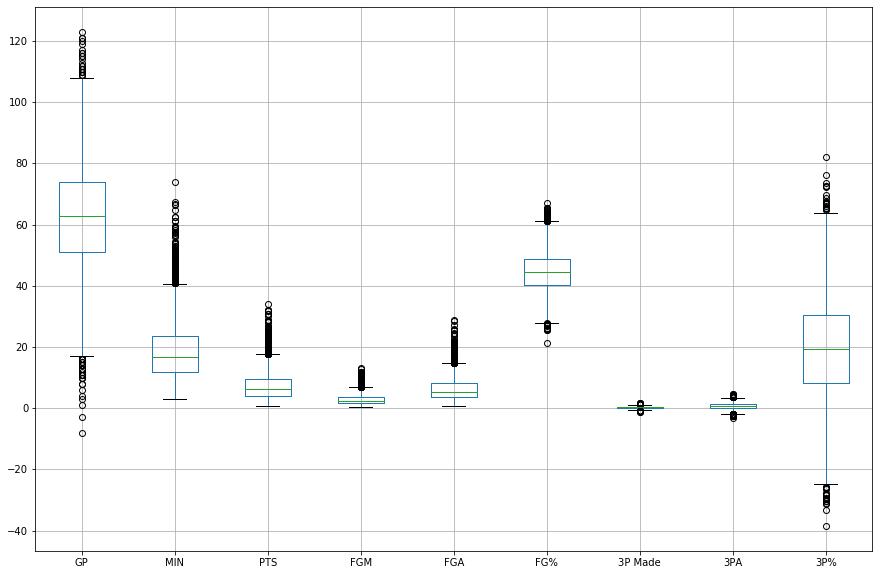

In [17]:
# plot the distribution of the first 5 variables
boxplot = training_data.boxplot(column=['GP', 'MIN', 'PTS','FGM','FGA','FG%','3P Made','3PA', '3P%'], figsize = (15,10))

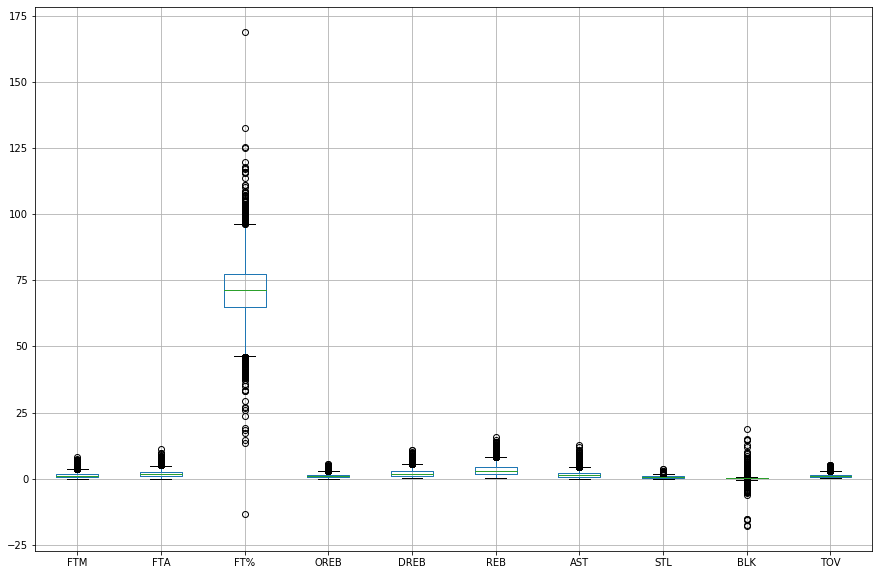

In [18]:
boxplot2 = training_data.boxplot(column=['FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV'], figsize = (15,10))

In [19]:
from src.features.helper_functions import load_sets

X_train, y_train, X_val, y_val, X_test = load_sets()

In [21]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 60 , learning_rate = 0.3)
adaboost = clf.fit(X_train, y_train)

In [22]:
# predict class
y_train_preds = adaboost.predict(X_train)
y_val_preds = adaboost.predict(X_val)

In [23]:
# predict proabilities
y_train_preds_prob = adaboost.predict_proba(X_train)
y_val_preds_prob = adaboost.predict_proba(X_val)

In [24]:
from src.features.helper_functions import result_metrics

In [26]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 83.45%
Precision: 83.56% 
Recall: 99.74% 
AUC using prediction probabilities: 72.398% 
              precision    recall  f1-score   support

           0       0.67      0.03      0.05      1074
           1       0.84      1.00      0.91      5326

    accuracy                           0.83      6400
   macro avg       0.76      0.51      0.48      6400
weighted avg       0.81      0.83      0.77      6400

Confusion Matrix
[[  29 1045]
 [  14 5312]]


In [27]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 83.69%
Precision: 84.20% 
Recall: 99.18% 
AUC using prediction probabilities: 70.159% 
              precision    recall  f1-score   support

           0       0.39      0.03      0.05       257
           1       0.84      0.99      0.91      1343

    accuracy                           0.84      1600
   macro avg       0.62      0.51      0.48      1600
weighted avg       0.77      0.84      0.77      1600

Confusion Matrix
[[   7  250]
 [  11 1332]]


In [28]:
# save model
from src.features.helper_functions import save_model

In [29]:
save_model(adaboost, 'rez_adaboost_1')

Model saved succesfully


In [ ]:
# predict on test set


In [30]:
# create an output for kaggle testing anyway.
y_test_preds = adaboost.predict(X_test)
y_test_preds_prob = adaboost.predict_proba(X_test)

In [31]:
print(y_test_preds)
print(y_test_preds_prob)

[1 1 1 ... 1 1 1]
[[0.48292888 0.51707112]
 [0.47996327 0.52003673]
 [0.46317878 0.53682122]
 ...
 [0.48255331 0.51744669]
 [0.46393048 0.53606952]
 [0.48093576 0.51906424]]


In [32]:
unique_elements, counts_elements = np.unique(y_test_preds, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [  30 3769]]


In [33]:
from src.features.helper_functions import create_output

In [34]:
output = create_output(y_test_preds_prob)

In [35]:
output

,Id,TARGET_5Yrs
0,0,0.517071
1,1,0.520037
2,2,0.536821
3,3,0.676380
4,4,0.519435
...,...,...
3794,3794,0.537870
3795,3795,0.521863
3796,3796,0.517447
3797,3797,0.536070


In [36]:
# save to csv
output.to_csv('../data/processed/output_adaboost_wk3.csv',index=False)

# KAGGLE SCORE = 0.70264

In [63]:
# lets try some other parameters
clf = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.1)
adaboost_2 = clf.fit(X_train, y_train)

Higher learning rate is beter, above 0.1 (0.05 was too low, it broke the model)
n_estimators should be >60, 150-200 seemed ok.


In [64]:
# predict class
y_train_preds = adaboost_2.predict(X_train)
y_val_preds = adaboost_2.predict(X_val)

In [65]:
# predict proabilities
y_train_preds_prob = adaboost_2.predict_proba(X_train)
y_val_preds_prob = adaboost_2.predict_proba(X_val)

In [66]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 83.44%
Precision: 83.52% 
Recall: 99.79% 
AUC using prediction probabilities: 72.268% 
              precision    recall  f1-score   support

           0       0.69      0.02      0.05      1074
           1       0.84      1.00      0.91      5326

    accuracy                           0.83      6400
   macro avg       0.76      0.51      0.48      6400
weighted avg       0.81      0.83      0.76      6400

Confusion Matrix
[[  25 1049]
 [  11 5315]]


In [67]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 83.56%
Precision: 84.13% 
Recall: 99.11% 
AUC using prediction probabilities: 70.408% 
              precision    recall  f1-score   support

           0       0.33      0.02      0.04       257
           1       0.84      0.99      0.91      1343

    accuracy                           0.84      1600
   macro avg       0.59      0.51      0.48      1600
weighted avg       0.76      0.84      0.77      1600

Confusion Matrix
[[   6  251]
 [  12 1331]]


In [68]:
# try adaboost with the resampled data
X_train_smoteus = np.load('../data/interim/X_train_smoteus.npy')
y_train_smoteus = np.load('../data/interim/y_train_smoteus.npy')

In [69]:
X_train_smoteus

array([[59. ,  8.8,  2.9, ...,  0.1,  0.2,  0.6],
       [57. , 15.7,  5.6, ...,  0.3,  0. ,  0.8],
       [47. , 11.4,  4.1, ...,  0.4,  0.4,  0.8],
       ...,
       [46. , 26.5,  9.3, ...,  0.7,  0.6,  1.7],
       [91. , 16.8,  4.8, ...,  0.7,  0.4,  0.9],
       [60. , 21.1,  7.5, ...,  0.8,  0.2,  0.9]])

In [70]:
adaboost_3 = clf.fit(X_train_smoteus, y_train_smoteus)

In [71]:
# predict class
y_train_preds = adaboost_3.predict(X_train)
y_val_preds = adaboost_3.predict(X_val)

In [72]:
# predict proabilities
y_train_preds_prob = adaboost_3.predict_proba(X_train)
y_val_preds_prob = adaboost_3.predict_proba(X_val)

In [73]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 75.62%
Precision: 88.19% 
Recall: 81.64% 
AUC using prediction probabilities: 71.648% 
              precision    recall  f1-score   support

           0       0.33      0.46      0.39      1074
           1       0.88      0.82      0.85      5326

    accuracy                           0.76      6400
   macro avg       0.61      0.64      0.62      6400
weighted avg       0.79      0.76      0.77      6400

Confusion Matrix
[[ 492  582]
 [ 978 4348]]


In [74]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 73.50%
Precision: 87.94% 
Recall: 79.30% 
AUC using prediction probabilities: 70.119% 
              precision    recall  f1-score   support

           0       0.29      0.43      0.34       257
           1       0.88      0.79      0.83      1343

    accuracy                           0.73      1600
   macro avg       0.58      0.61      0.59      1600
weighted avg       0.78      0.73      0.76      1600

Confusion Matrix
[[ 111  146]
 [ 278 1065]]


Try with oversampled data

In [75]:
# try adaboost with the resampled data
X_train_os = np.load('../data/interim/X_train_os.npy')
y_train_os = np.load('../data/interim/y_train_os.npy')

In [77]:
X_train_os.shape

(10652, 19)

In [78]:
adaboost_4 = clf.fit(X_train_os, y_train_os)

In [79]:
# predict class
y_train_preds = adaboost_4.predict(X_train)
y_val_preds = adaboost_4.predict(X_val)

In [80]:
# predict proabilities
y_train_preds_prob = adaboost_4.predict_proba(X_train)
y_val_preds_prob = adaboost_4.predict_proba(X_val)

In [81]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 64.41%
Precision: 90.60% 
Recall: 63.86% 
AUC using prediction probabilities: 72.157% 
              precision    recall  f1-score   support

           0       0.27      0.67      0.39      1074
           1       0.91      0.64      0.75      5326

    accuracy                           0.64      6400
   macro avg       0.59      0.65      0.57      6400
weighted avg       0.80      0.64      0.69      6400

Confusion Matrix
[[ 721  353]
 [1925 3401]]


In [82]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 62.69%
Precision: 90.72% 
Recall: 61.88% 
AUC using prediction probabilities: 69.976% 
              precision    recall  f1-score   support

           0       0.25      0.67      0.37       257
           1       0.91      0.62      0.74      1343

    accuracy                           0.63      1600
   macro avg       0.58      0.64      0.55      1600
weighted avg       0.80      0.63      0.68      1600

Confusion Matrix
[[172  85]
 [512 831]]


Not much difference between original data and smote, oversampled is the worst performer.

Following this example https://www.kaggle.com/sasadeghi/final 

In [83]:
from sklearn.preprocessing import QuantileTransformer
sc = QuantileTransformer()
X = sc.fit_transform(X_train)
XVAL = sc.transform(X_val)

In [84]:
from sklearn.kernel_approximation import AdditiveChi2Sampler
sc = AdditiveChi2Sampler()
X = sc.fit_transform(X)
XVAL = sc.transform(XVAL)

In [87]:
# train on transformed data
#clf = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.1)
adaboost_exmp = clf.fit(X, y_train)

In [88]:
# predict class
y_train_preds = adaboost_exmp.predict(X)
y_val_preds = adaboost_exmp.predict(XVAL)

In [89]:
# predict proabilities
y_train_preds_prob = adaboost_exmp.predict_proba(X)
y_val_preds_prob = adaboost_exmp.predict_proba(XVAL)

In [90]:
result_metrics(y_train, y_train_preds,y_train_preds_prob)

Accuracy: 83.41%
Precision: 83.46% 
Recall: 99.85% 
AUC using prediction probabilities: 72.540% 
              precision    recall  f1-score   support

           0       0.71      0.02      0.04      1074
           1       0.83      1.00      0.91      5326

    accuracy                           0.83      6400
   macro avg       0.77      0.51      0.47      6400
weighted avg       0.81      0.83      0.76      6400

Confusion Matrix
[[  20 1054]
 [   8 5318]]


In [91]:
result_metrics(y_val, y_val_preds,y_val_preds_prob)

Accuracy: 83.75%
Precision: 84.16% 
Recall: 99.33% 
AUC using prediction probabilities: 69.956% 
              precision    recall  f1-score   support

           0       0.40      0.02      0.04       257
           1       0.84      0.99      0.91      1343

    accuracy                           0.84      1600
   macro avg       0.62      0.51      0.48      1600
weighted avg       0.77      0.84      0.77      1600

Confusion Matrix
[[   6  251]
 [   9 1334]]


Bit worse than the basic adaboost_2. 

# changing the base "stump" estimator

https://machinelearningmastery.com/adaboost-ensemble-in-python/ 

We can use a simple decision tree classifier to use as a base for adaboost

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [94]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base,n_estimators = 150, learning_rate = 0.1)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.694 (0.030)
>2 0.680 (0.033)
>3 0.654 (0.033)
>4 0.638 (0.029)
>5 0.625 (0.029)
>6 0.622 (0.025)
>7 0.619 (0.031)
>8 0.620 (0.031)
>9 0.642 (0.034)
>10 0.635 (0.032)


In [98]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [50, 100, 150, 200, 300]
grid['learning_rate'] = [0.1,0.25, 0.5, 1.0, 1.5]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.698229 using {'learning_rate': 0.1, 'n_estimators': 50}
